In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned merged dataset
df = pd.read_csv("../data/processed/merged_clean.csv", index_col=0, parse_dates=True)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Data loaded:", df.shape)
df.head()

Data loaded: (1035, 14)


,Close_BTC,Volume_BTC,BTC_Return,BTC_MA7,BTC_MA30,BTC_Vol30,Close_ETH,Volume_ETH,ETH_Return,ETH_MA7,ETH_MA30,ETH_Vol30,FG_Value,value_classification
2023-02-01,23723.769531,2.668326e+10,0.025259,23231.479074,20606.082031,0.023814,1641.792725,8.116969e+09,0.034829,1602.215402,1490.054069,0.028151,56,Greed
2023-02-02,23471.871094,3.206694e+10,-0.010618,23294.206752,20832.482487,0.024069,1643.241577,1.055808e+10,0.000882,1607.949062,1504.336161,0.028141,60,Greed
2023-02-03,23449.322266,2.708307e+10,-0.000961,23347.148717,21052.018620,0.024180,1664.745605,8.169520e+09,0.013086,1617.461792,1517.943461,0.027785,60,Greed
2023-02-04,23331.847656,1.563930e+10,-0.005010,23390.114118,21268.522331,0.024251,1667.059204,5.843303e+09,0.001390,1630.979527,1531.830815,0.027695,58,Greed
2023-02-05,22955.666016,1.956426e+10,-0.016123,23273.128348,21468.645573,0.024751,1631.645874,6.926697e+09,-0.021243,1628.906703,1543.906376,0.028253,58,Greed


           Close_BTC    Close_ETH     FG_Value
count    1035.000000  1035.000000  1035.000000
mean    66185.535407  2660.191972    56.944928
std     31535.603906   837.640059    16.682142
min     20187.244141  1429.158081    10.000000
25%     30654.557617  1871.952942    48.000000
50%     64178.992188  2526.441895    60.000000
75%     96496.214844  3331.413330    71.000000
max    124752.531250  4831.348633    94.000000


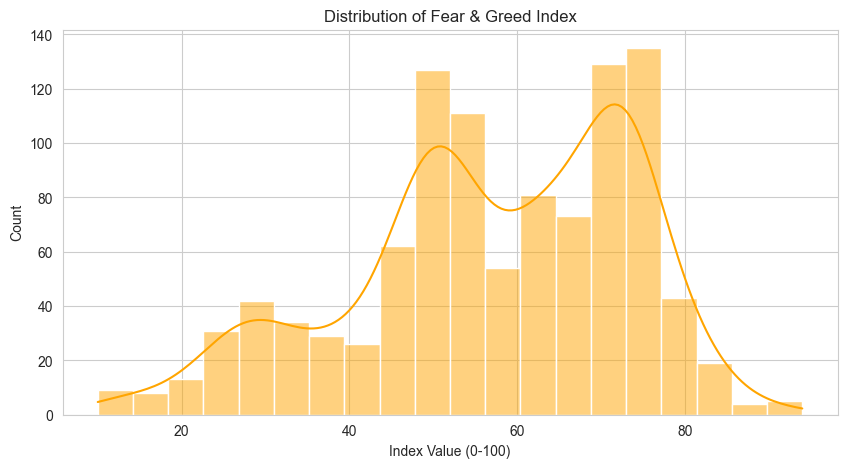

In [13]:
# Summary statistics for prices and sentiment
print(df[["Close_BTC", "Close_ETH", "FG_Value"]].describe())

# Check distribution of Sentiment
plt.figure(figsize=(10, 5))
sns.histplot(df["FG_Value"], bins=20, kde=True, color="orange")
plt.title("Distribution of Fear & Greed Index")
plt.xlabel("Index Value (0-100)")
plt.show()

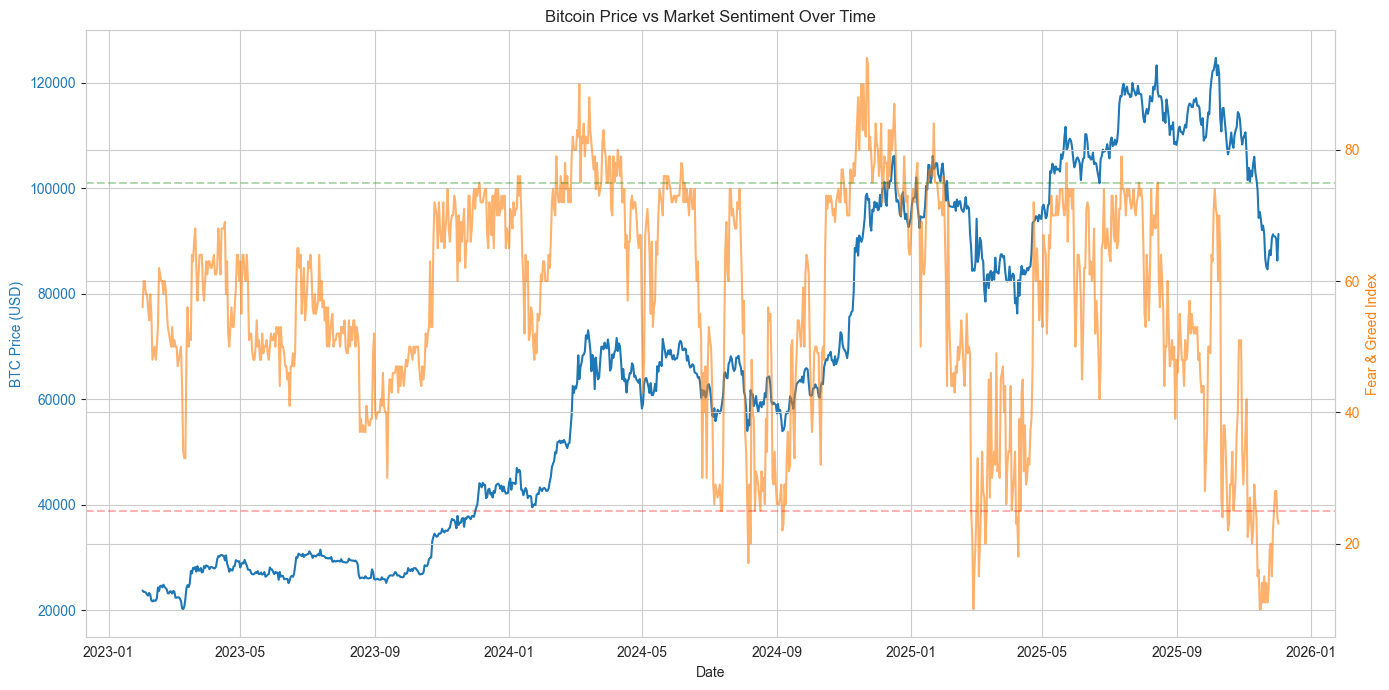

In [14]:
# Plot BTC Price vs Fear & Greed Index
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Price on left axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color=color)
ax1.plot(df.index, df["Close_BTC"], color=color, label="BTC Price")
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Sentiment
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Fear & Greed Index', color=color)
ax2.plot(df.index, df["FG_Value"], color=color, alpha=0.6, label="Sentiment")
ax2.tick_params(axis='y', labelcolor=color)

# Highlight Fear/Greed zones
ax2.axhline(25, color='red', linestyle='--', alpha=0.3, label="Extreme Fear (<25)")
ax2.axhline(75, color='green', linestyle='--', alpha=0.3, label="Extreme Greed (>75)")

plt.title("Bitcoin Price vs Market Sentiment Over Time")
fig.tight_layout()
plt.show()

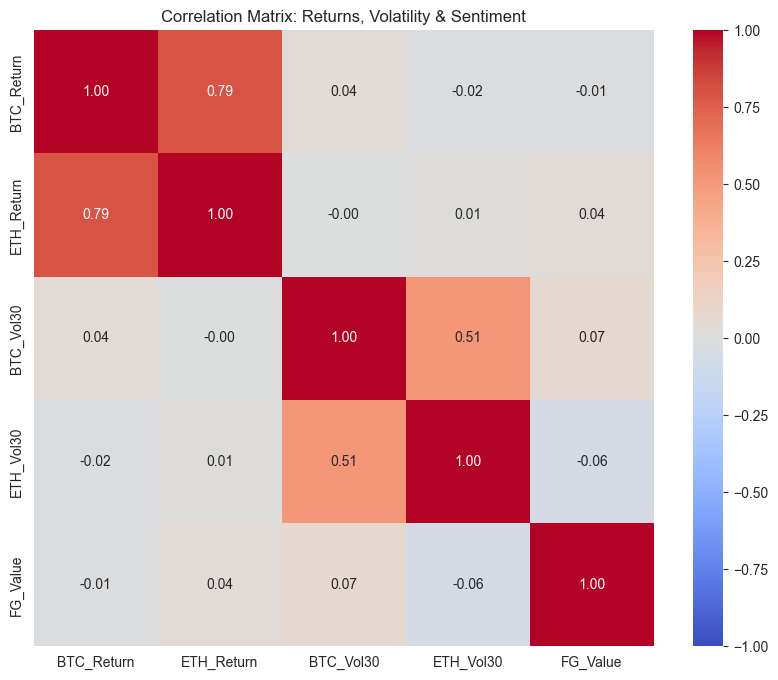

In [15]:
# Select numeric columns for correlation
cols = ["BTC_Return", "ETH_Return", "BTC_Vol30", "ETH_Vol30", "FG_Value"]
corr_matrix = df[cols].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix: Returns, Volatility & Sentiment")
plt.show()


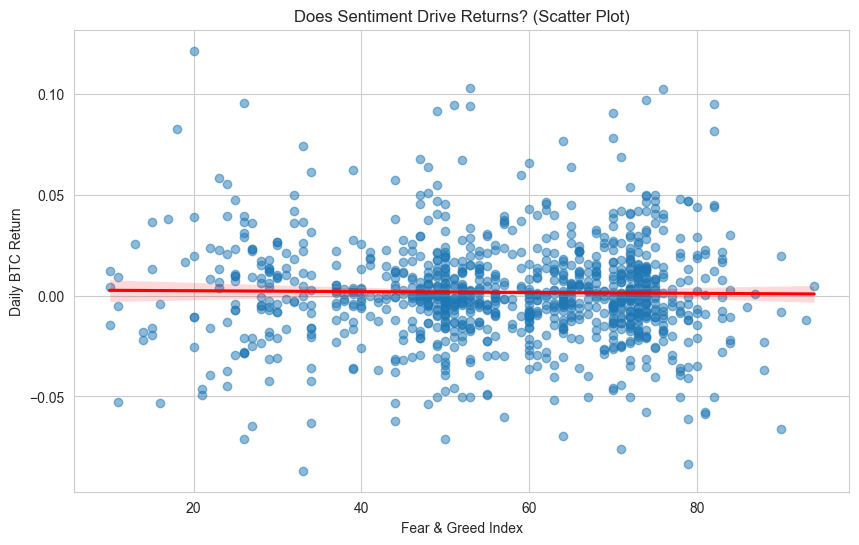

In [16]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="FG_Value", y="BTC_Return", data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Does Sentiment Drive Returns? (Scatter Plot)")
plt.xlabel("Fear & Greed Index")
plt.ylabel("Daily BTC Return")
plt.show()


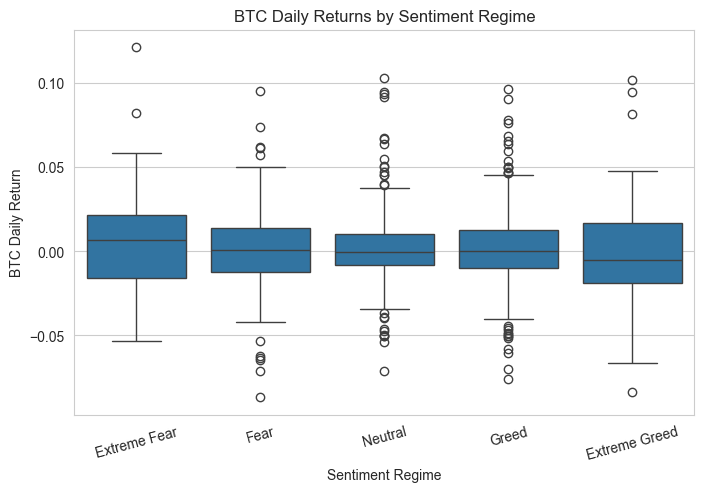

In [17]:
# Boxplot of returns by sentiment regime
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="value_classification", y="BTC_Return", data=df, order=["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"])
plt.title("BTC Daily Returns by Sentiment Regime")
plt.xlabel("Sentiment Regime")
plt.ylabel("BTC Daily Return")
plt.xticks(rotation=15)
plt.show()